# Introduction: Credit Score Prediction using Machine Learning

![Credit Score](credit_score.jpg)

In this project, we will accurately predict credit score based on a person's income, education, home ownership status, etc. A credit score is a number that tells financial institutions how good you are at managing your money. It helps banks and lenders understand how much risk they are taking by giving you money based on your payment history, credit history, and other factors. Having a good credit score helps make it easier to get a new credit card or get approved for a car loan. 

Here, we will build a predictive model using Decision Trees and Hyperparameter tuning with Grid Search to accurately predict credit scores. Then we will test out the model on new data, so you can understand what goes into having a high credit score and make smart financial decisions!

# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

C:\Users\Akhila Ravikumar\AppData\Local\Temp\ipykernel_1736\1450209237.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Reading in the Credit Score Classification Dataset

In [3]:
df = pd.read_csv('Credit Score Classification Dataset.csv')

# Exploratory Data Analysis

In [4]:
# Display the first few rows of the dataset

df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [5]:
# Check if there are any null values

df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [6]:
# Gather more information on the dataset (data types, number of values, columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [7]:
# Determine what the possible Education and Credit Score values are in the dataset

print(df['Education'].unique())
print(df['Credit Score'].unique())


["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
['High' 'Average' 'Low']


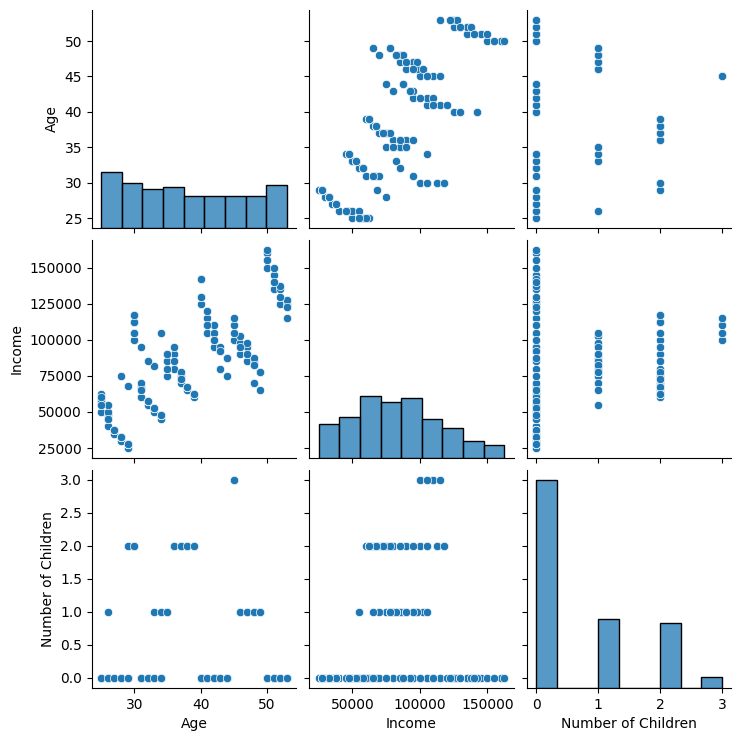

In [8]:
# Graph a pairplot to explore the relationships between the numerical variables Age, Income, and Number of Children

sns.pairplot(df)

In [9]:
# The categorical variables (gender, education, marital status, home ownership, and credit score) need to be converted into numbers to be able to work with the ML algorithms

gender_mapping = {"Male":1, "Female":2}
df['Gender'] = df['Gender'].map(gender_mapping)

education_mapping = {"Bachelor's Degree":1, "Master's Degree":2, "Doctorate":3, "High School Diploma":4, "Associate's Degree":5}
df['Education'] = df['Education'].map(education_mapping)

marital_status_mapping = {"Single":1, "Married":2}
df['Marital Status'] = df['Marital Status'].map(marital_status_mapping)

home_ownership_mapping = {"Rented":1, "Owned":2}
df['Home Ownership'] = df['Home Ownership'].map(home_ownership_mapping)

credit_score_mapping = {"High":1, "Average":2, "Low":3}
df['Credit Score'] = df['Credit Score'].map(credit_score_mapping)

In [10]:
# Confirm that the categorical variables have been converted into numbers by displaying the first few rows of the dataset

df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,2,50000,1,1,0,1,1
1,30,1,100000,2,2,2,2,1
2,35,2,75000,3,2,1,2,1
3,40,1,125000,4,1,0,2,1
4,45,2,100000,1,2,3,2,1


Text(0.5, 1.0, 'Correlation Heat Map')

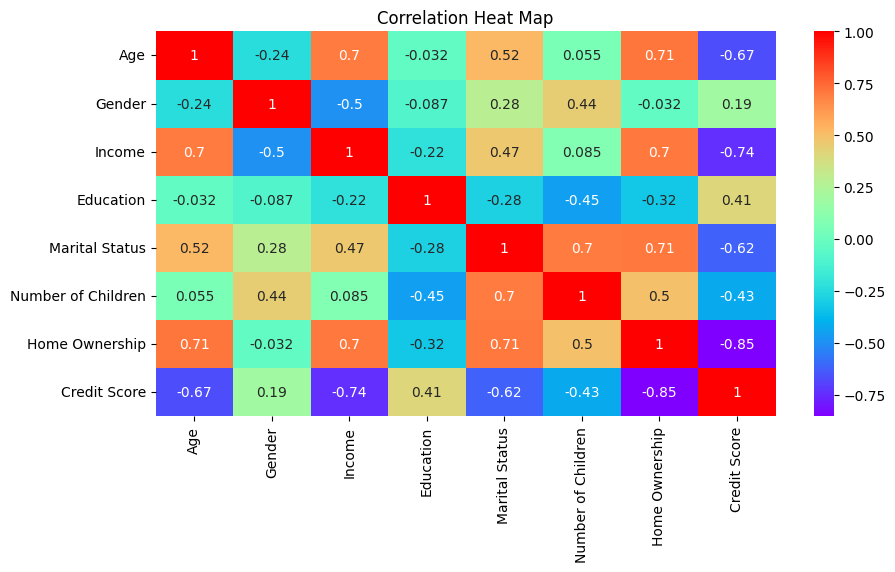

In [11]:
# Plot a correlation heatmap to analyze patterns between all variables

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="rainbow")
plt.title("Correlation Heat Map")

The Correlation Heatmap shows that:
* As age increases, so does income. As individuals gain work tenure in their careers, they often see increases in their income.
* As age increases, so does the likelihood of owning a home. Older individuals are more likely to have enough saved for a down payment and to qualify for a mortgage.
* Marital status and Home ownership are positively correlated. Married individuals typically have a combined income that's higher compared to single individuals and are more likely to be able to afford a home.

# Determine the Best ML Model to Use

In [12]:
# Split the data into features and the target variable.
# Here, the featurs are all the columns except the credit score and the target variable holds the actual credit score values we want the model to predict
x = df.drop('Credit Score', axis=1)
y = df['Credit Score']

# Split the dataset where 80% of the data will be used for training and 20% will be used for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Determine the list of ML Models to evaluate
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    LinearSVC(dual=False),
    SVC()    
]

# Perform 10-fold cross-validation on each model and determine accuracy
results = {}
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    results[model_name] = scores.mean() * 100

# Display the cross-validation accuracy for each model
for model_name, score in results.items():
    print(f"{model_name}: {score:.2f}%")

# Determine which model has the highest average accuracy
best_model = max(results, key=results.get)
print(f"\nBest model is {best_model} with accuracy {results[best_model]:.2f}%")


LogisticRegression: 86.98%
DecisionTreeClassifier: 96.98%
RandomForestClassifier: 96.98%
MLPClassifier: 48.74%
KNeighborsClassifier: 94.01%
GradientBoostingClassifier: 96.98%
BaggingClassifier: 96.98%
LinearSVC: 74.07%
SVC: 82.47%

Best model is DecisionTreeClassifier with accuracy 96.98%


# Training a Decision Tree Classifier Model to Predict Credit Scores with Hyperparameter Tuning

In [13]:
# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier()

# Specify the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Complete a grid search with 5-fold cross validation to determine the best hyperparameters to use
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Identify and print out the best parameters to use in the model
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Parameters:{best_params}")


# Now knowing the best parameters to use, create a new Decision Tree Classifier object incorporating these parameters and train the model
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train, y_train)

# The model will make a prediction on the credit score using the test data
y_pred = best_dt_classifier.predict(x_test)

# Show a classification report displaying how the model performed and print out the accuracy as a percentage
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = best_dt_classifier.score(x_test, y_test)
print(f"Best Model Accuracy: {accuracy*100:.2f}%")


Best Parameters:{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         5

    accuracy                           0.94        33
   macro avg       0.92      0.92      0.92        33
weighted avg       0.94      0.94      0.94        33

Best Model Accuracy: 93.94%


The **Decision Tree Classifier Model** was able to predict credit scores with **accuracy >90%**!

# Test the Model with New Data

In [14]:
#Referencing the conversion of categorical variables to numbers performed earlier

gender_mapping = {"Male":1, "Female":2}
education_mapping = {"Bachelor's Degree":1, "Master's Degree":2, "Doctorate":3, "High School Diploma":4, "Associate's Degree":5}
marital_status_mapping = {"Single":1, "Married":2}
home_ownership_mapping = {"Rented":1, "Owned":2}

# Create new data to test the model
new_data = pd.DataFrame({
    'Age': [57],
    'Gender': ["Male"],  
    'Income': [200000],
    'Education': ["Master's Degree"],  
    'Marital Status': ["Married"], 
    'Number of Children': [2],
    'Home Ownership': ["Owned"],  
})

# Map categorical variables to numerical values
new_data['Gender'] = new_data['Gender'].map(gender_mapping)
new_data['Education'] = new_data['Education'].map(education_mapping)
new_data['Marital Status'] = new_data['Marital Status'].map(marital_status_mapping)
new_data['Home Ownership'] = new_data['Home Ownership'].map(home_ownership_mapping)

# The model predicts a credit score for the new data
predicted_credit_score = best_dt_classifier.predict(new_data)

# Print the predicted credit score for the new data
if predicted_credit_score == 1:
    print("Predicted Credit Score: High")
elif predicted_credit_score == 2:
    print("Predicted Credit Score: Average")
else:
    print("Predicted Credit Score: Low")



Predicted Credit Score: High
